# Métodos de Búsqueda: Algoritmo A*

En este ejercicio, se aplicará el algoritmo de búsqueda A* para recorrer un grafo y encontrar la solución al problema planteado. Se explorarán las listas ABIERTOS (mostrando el valor F' de cada nodo) y CERRADOS en cada iteración. Los nodos solución son **L** y **J**, y cuanto menor es el valor heurístico, más deseable es el nodo.

### Consideraciones:
1. Existe un costo de transición de valor 1 entre nodos conectados.
2. Se utilizará la representación gráfica del grafo para facilitar el análisis.

El grafo que se utiliza para este ejercicio se representa de la siguiente manera:

![Grafo del problema](imagenes/grafo.png)

## Representación del Grafo

El grafo se representará mediante una estructura de datos tipo diccionario en Python, donde las claves son los nodos y los valores son sus vecinos con los costos asociados.

In [1]:
#Representación del grafo
grafo = {
    'A': {'B': 1, 'C': 1},
    'B': {'D': 1, 'E': 1},
    'C': {'F': 1, 'G': 1, 'H' : 1},
    'D': {},
    'E': {'I': 1, 'J': 1},
    'F': {},
    'G': {'J': 1},
    'H': {'K': 1},
    'I': {'L': 1},
    'J': {},
    'K': {'L': 1},
    'L': {}
}

## Valores Heurísticos

Los valores heurísticos se asignan a cada nodo. Estos valores representan la estimación del costo restante para llegar al nodo objetivo. A continuación, se muestran los valores heurísticos utilizados:

In [2]:
#Valores heurísticos
heuristica = {
    'A': 12, 'B': 7, 'C': 6, 'D': 3, 'E': 4,
    'F': 9, 'G': 10, 'H': 8, 'I': 1, 'J': 0,
    'K': 2, 'L': 0
}

## Implementación del Algoritmo A*

El siguiente código implementa el algoritmo A*, incluyendo la impresión de las listas ABIERTOS y CERRADOS en cada iteración, y mostrando el camino encontrado.

In [3]:
import heapq

def a_estrella(inicio, objetivos):
    abiertos = []  # Lista de prioridad
    heapq.heappush(abiertos, (heuristica[inicio], inicio))  # (F(n), nodo)
    cerrados = set()  
    costos = {inicio: 0}  # g(n)
    padres = {inicio: None}  # Para rastrear el camino

    while abiertos:
        f_actual, nodo_actual = heapq.heappop(abiertos)
        
        if nodo_actual in objetivos:
            print(f"¡Nodo objetivo alcanzado: {nodo_actual}!")
            camino = []
            while nodo_actual is not None:
                camino.append(nodo_actual)
                nodo_actual = padres[nodo_actual]
            print("Camino: ", ' -> '.join(camino[::-1]))
            print("Costo total: ", costos[camino[0]])
            return

        cerrados.add(nodo_actual)
        print(f"Nodo explorado: {nodo_actual}, F = {f_actual}")
        
        for vecino, costo_transicion in grafo[nodo_actual].items():
            if vecino in cerrados:
                continue
            
            g_nuevo = costos[nodo_actual] + costo_transicion
            f_nuevo = g_nuevo + heuristica[vecino]
            
            if vecino not in costos or g_nuevo < costos[vecino]:
                costos[vecino] = g_nuevo
                padres[vecino] = nodo_actual
                heapq.heappush(abiertos, (f_nuevo, vecino))
                print(f"  Nodo agregado a abiertos: {vecino}, F = {f_nuevo}")
        print("")

# Ejecutar
a_estrella('A', {'L', 'J'})

Nodo explorado: A, F = 12
  Nodo agregado a abiertos: B, F = 8
  Nodo agregado a abiertos: C, F = 7

Nodo explorado: C, F = 7
  Nodo agregado a abiertos: F, F = 11
  Nodo agregado a abiertos: G, F = 12
  Nodo agregado a abiertos: H, F = 10

Nodo explorado: B, F = 8
  Nodo agregado a abiertos: D, F = 5
  Nodo agregado a abiertos: E, F = 6

Nodo explorado: D, F = 5

Nodo explorado: E, F = 6
  Nodo agregado a abiertos: I, F = 4
  Nodo agregado a abiertos: J, F = 3

¡Nodo objetivo alcanzado: J!
Camino:  A -> B -> E -> J
Costo total:  3


## Representación Gráfica

Se utilizará la biblioteca `networkx` para dibujar el grafo y visualizar las conexiones entre los nodos.

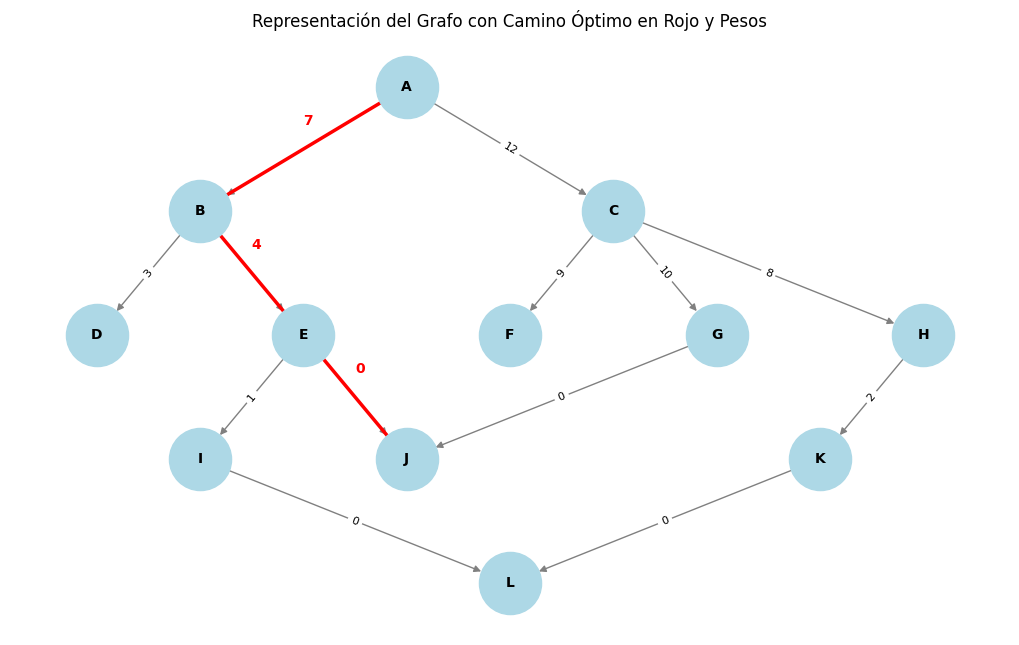

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

#Crear grafo dirigido
G = nx.DiGraph()

#Agregar nodos y aristas con pesos
aristas = [
    ('A', 'B', 7), ('A', 'C', 12),
    ('B', 'D', 3), ('B', 'E', 4),
    ('C', 'F', 9), ('C', 'G', 10), ('C', 'H', 8),
    ('E', 'I', 1), ('E', 'J', 0),
    ('G', 'J', 0), ('H', 'K', 2),
    ('I', 'L', 0), ('K', 'L', 0)
]

for origen, destino, peso in aristas:
    G.add_edge(origen, destino, weight=peso)

#Posiciones personalizadas
pos = {
    'A': (0, 5),
    'B': (-2, 4), 'C': (2, 4),
    'D': (-3, 3), 'E': (-1, 3), 'F': (1, 3), 'G': (3, 3), 'H': (5, 3),
    'I': (-2, 2), 'J': (0, 2), 'K': (4, 2),
    'L': (1, 1)
}

#Definir el camino óptimo
camino_optimo = [('A', 'B'), ('B', 'E'), ('E', 'J')]

#Filtrar las etiquetas del grafo eliminando las del camino óptimo
labels = {
    (u, v): d['weight']
    for u, v, d in G.edges(data=True)
    if (u, v) not in camino_optimo
}

# Dibujar el grafo
plt.figure(figsize=(10, 6))
nx.draw(
    G, pos, with_labels=True, node_size=2000, node_color="lightblue", 
    font_size=10, font_weight="bold", edge_color="gray"
)

#Dibujar las etiquetas restantes (no en el camino rojo)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#Resaltar el camino óptimo en rojo
nx.draw_networkx_edges(
    G, pos, edgelist=camino_optimo, edge_color="red", width=2.5
)

#Dibujar etiquetas de peso específicas para el camino óptimo
for origen, destino in camino_optimo:
    x_origen, y_origen = pos[origen]
    x_destino, y_destino = pos[destino]
    peso = G[origen][destino]['weight']
    x_label = (x_origen + x_destino) / 2
    y_label = (y_origen + y_destino) / 2 + 0.2  #Subir la posición de la etiqueta
    plt.text(x_label, y_label, str(peso), color="red", fontweight="bold", fontsize=10)

#Título
plt.title("Representación del Grafo con Camino Óptimo en Rojo y Pesos")
plt.show()


## Aplicaciones del Método de Búsqueda A*

El método de búsqueda A* es ampliamente utilizado debido a su capacidad para encontrar rutas óptimas en una amplia variedad de dominios. Algunas de sus aplicaciones más destacadas incluyen:

1. **Sistemas de navegación:**
   - En aplicaciones como Google Maps, Waze o sistemas GPS, A* se utiliza para calcular rutas óptimas considerando distancias, tráfico y otros factores.

2. **Videojuegos:**
   - Es comúnmente usado en la inteligencia artificial de NPCs (Non-Player Characters) para calcular caminos eficientes hacia un objetivo, evitando obstáculos en mapas complejos.

3. **Robótica:**
   - A* se emplea en robots móviles para encontrar rutas óptimas en entornos desconocidos o dinámicos, como fábricas o almacenes automatizados.

4. **Planeación y logística:**
   - Para optimizar rutas en redes de transporte, distribución de mercancías y planeación de horarios.

5. **Resolución de puzzles:**
   - Se utiliza en problemas como el cubo de Rubik, el rompecabezas de los 8 (8-puzzle) y otros problemas de búsqueda heurística.

6. **Redes de comunicación:**
   - A* es aplicado en redes para calcular rutas óptimas de transmisión de datos considerando costos o restricciones específicas.

El uso del algoritmo A* es preferido en escenarios donde se necesita un equilibrio entre eficiencia y precisión en la búsqueda de rutas óptimas.